# Exercise 4 $\newcommand{\R}{\mathbb{R}}$ $\newcommand{\N}{\mathbb{N}}$ $\newcommand{\inpd}[2]{\left\langle #1,#2 \right\rangle}$ $\newcommand{\norm}[2][]{\Vert #2 \Vert_{#1}}$
## Suppor Vector Machines

Last week, we solved a Binary Classification problem by using Logistic Regression. This week, we will solve this problem by using Support Vector Machines or SVM. We will use the same training dataset $ \{ (x^{(i)}, y^{(i)}) \in \R^n \times \{-1, 1\} : 1 \leq i \leq M \} $ as before (It is more convenient to use $ \{-1, 1\} $ as the label space instead of $ \{0, 1\} $ when using SVM).

### Hinge Loss
It can be shown that the training process of SVM is equivalent to minimizing the regularized hinge-loss, i.e.,
$$ \min_{w \in \R^N} \frac{1}{2} \norm[2]{w}^2 + \frac{C}{M} \sum_{i=1}^{M} \max(0, 1-y^{(i)} w^T p(x^{(i)})) \,, $$
where $ p : \R^n \to \R^N $ is any feature transform and $ C > 0 $ controls the regularization. For inference, given a feature vector $ x \in \R^n $, we compute the expression $ \mathrm{sign}\; w^T p(x) $.

### Making the Objective Smooth
The problem with the hinge-loss is that it is non-smooth and is therefore not suitable to be minimized by gradient-based methods. We will therefore resort to the following smooth relaxation of it:
$$ \min_{w \in \R^N} \frac{1}{2} \norm[2]{w}^2 + \frac{C}{M} \sum_{i=1}^{M} l(y^{(i)} w^T p(x^{(i)})) \,, $$
where $ l : \R \to \R $ is defined as:
$$ l(s) = \begin{cases} 
      \frac{1}{2} - s & s \leq 0 \\
      \frac{1}{2} (1 - s)^2 & 0 < s < 1 \\
      0 & 1 \leq s
   \end{cases} \,. $$
It is easy to see that the new objective is smooth and approximates the hinge-loss really well.

### Kernel Method

A really helpful thing about the SVM is the kernel method, which reduces the memory overhead caused by the feature transform. To see that, consider a degree $2$ polynomial feature transform applied to feature vector $x \in \R^n$. The new feature vector generated $a$ has the dimension equal to $1 + n + \frac{n(n-1)}{2}$. In general, a degree $d$ polynomial feature transform generates $ \mathcal{O} (n^d) $ features. This becomes infeasible as $n$ grows. To get around this situation, we employ the kernel trick. That is, given a kernel function $ k : \R^n \times \R^n \to \R $, we solve the following optimization problem:
$$ \min_{\alpha \in \R^M} \frac{1}{2} \alpha^T D \alpha + \frac{C}{M} \sum_{i=1}^{M} l\bigg(y^{(i)} \sum_{j=1}^{M} y^{(j)} \alpha_j D_{i, j}\bigg) \,, $$
where $ D \in R^{M \times M} $ is the similarity matrix with entries $ D_{i, j} = k(x^{(i)}, x^{(j)}) $ and $ l $ is defined above. Given a feature vector $x \in \R^n$, the inference is now done by evaluating the expression $ \mathrm{sign}\; \sum_{j=1}^{M} y^{(j)} \alpha_j k (x, x^{(j)}) $.

### Note
You are not required to understand how (Kernel) SVM works. You only need to compute $D$ from the dataset, minimize the objective over $\alpha \in \R^M$ and make predictions for any $x \in \R^n$. In this exercise, we will use the polynomial kernel which is defined as:
$$ k(x, y) = (x^T y + c)^d \,, $$
where $ c \geq 0, d \in \N $ are the kernel parameters.

We first load the dataset and do some minor adjustments to it.

In [1]:
# Import the packages. Don't use any other packages.
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12)

# Load the datasets
data = np.loadtxt("dataset")
features = data[:, :-1]
targets = data[:, -1]

targets[targets==0] = -1
features = features - np.mean(features, axis=0)[np.newaxis, :]

## Implementation

We will implement our classifier as Class *ModifiedPolySVM*. Read the following instructions carefully and fill in the missing code below.
* *\__init__*: The inputs *features* and *targets* correspond to $X\in\R^{M\times n}$ and $y\in\{-1, 1\}^M$ respectively. In this function, you are asked to compute the similarity matrix $ D \in \R^{M \times M} $ from $ X $ for a polynomial kernel.

#### Task 1 - Compute the Similarity Matrix $D$ in *\__init__* function (2 points).

* *train*: In this function, we run the gradient descent algorithm for *max\_iters* number of iterations and update *self.weights* variable. We print the training accuracy after every 500 iterations and employ a stopping criterion. You are required to update this function to use Accelerated Gradient Descent instead. Implement Algorithm 8.1 in the lecture notes with $t_k$ computed by using the expression in Theorem 8.4 with $a = 4$.

#### Task 2 - Update the code in *train* function (6 points).

* *predict*: This function takes in as input the *features* variable ($ X_n \in \R^{L\times n} $ (this matrix can come from any seen or unseen dataset). You are required to return the vector $ t \in R^L $ where the $i^{\mathrm{th}}$ element of $t$ is given by $t^{(i)} = \sum_{j=1}^{M} y^{(j)} \alpha_j k (x_n^{(i)}, x^{(j)})$ with $ x_n^{(i)} $ being the $i^{\mathrm{th}}$ row of $X_n$.

#### Task 3- Complete the code for *predict* function (4 points).

* *loss*: You are required to return the objective function corresponding to the Kernel SVM with smooth hinge loss.

#### Task 4- Complete the code for *loss* function (4 points).

* *grad\_loss*: You are required to return the gradient of the objective function corresponding to the Kernel SVM with smooth hinge loss.

#### Task 5- Complete the code for *grad\_loss* function (4 points).


In [2]:
class ModifiedPolySVM:
    def __init__(self, features, targets, reg_param, degree, bias):
        self.features = features                      # M-by-n feature matrix X
        self.targets = targets                        # M-dimensional target vector y.
        self.reg_param = reg_param                    # Regularization Parameter C.
        self.degree = degree                          # kernel parameter d.
        self.bias = bias                              # kernel parameter c.
        self.weights = 0.001 * np.random.randn(targets.size)
        
        # Compute the polynomial kernel similarity matrix
        self.similarity = (features @ features.T + bias) ** degree
        
        # Computing the Lipschitz Constant
        norm_D = np.linalg.norm(self.similarity, 2)
        norm_E = np.linalg.norm(self.similarity * targets[np.newaxis, :])
        self.lip_const = reg_param / targets.size * norm_E**2 + norm_D
    
    def train(self, max_iters=100, stepsize=None, tol=1e-15):
        if stepsize is None:
            stepsize = 1 / self.lip_const
        for i in range(max_iters):
            grad = self.grad_loss()
            if np.linalg.norm(grad) < tol:
                break
            if (i + 1) % 100 == 0:
                print(i+1, "iterations passed. Training Accuracy =", self.accuracy(), end="%\n")
            self.weights -= stepsize * grad
    
    def predict(self, features=None):
        if features is None:
            features = self.features
        similarity = (features @ self.features.T + self.bias) ** self.degree
        predictions = similarity @ self.weights
        return np.sign(predictions)
    
    def loss(self):
        # Hinge loss + regularization term
        margins = 1 - self.targets * (self.similarity @ self.weights)
        hinge_loss = np.maximum(0, margins).mean()
        reg_term = 0.5 * self.reg_param * np.sum(self.weights ** 2)
        return hinge_loss + reg_term
    
    def grad_loss(self):
        # Gradient of hinge loss + regularization term
        margins = 1 - self.targets * (self.similarity @ self.weights)
        indicator = (margins > 0).astype(float)
        grad_hinge = -self.similarity.T @ (indicator * self.targets) / self.targets.size
        grad_reg = self.reg_param * self.weights
        return grad_hinge + grad_reg
    
    def accuracy(self):
        predictions = self.predict()
        acc = np.sum(predictions * self.targets > 0) / self.targets.size
        return np.round(acc * 100, 2)

## Testing our Implementation

We will now train our model by running it for $1,000$ iterations and plot the decision boundary. You can compare the results obtained from both Gradient Descent and Accelerated Gradient Descent.

In [3]:
svm = ModifiedPolySVM(features, targets, 5000, 5, 1)
svm.train(max_iters=1000)

100 iterations passed. Training Accuracy = 57.67%
200 iterations passed. Training Accuracy = 58.42%
300 iterations passed. Training Accuracy = 58.92%
400 iterations passed. Training Accuracy = 59.58%
500 iterations passed. Training Accuracy = 59.83%
600 iterations passed. Training Accuracy = 61.08%
700 iterations passed. Training Accuracy = 61.67%
800 iterations passed. Training Accuracy = 62.0%
900 iterations passed. Training Accuracy = 61.67%
1000 iterations passed. Training Accuracy = 61.5%


In [4]:
def plot_dataset(ax):
    x1 = features[:, 0]
    x2 = features[:, 1]
    b = targets
    ax.plot(x1[b==-1], x2[b==-1], 'r.')
    ax.plot(x1[b==1], x2[b==1], 'bx')

def plot_boundary(ax):
    x1 = np.linspace(-0.5, 0.5, 101)
    x2 = np.linspace(-0.5, 0.5, 101)
    X1, X2 = np.meshgrid(x1, x2)
    feat = np.stack((X1.reshape(-1), X2.reshape(-1)), axis=1)
    
    pred = svm.predict(feat).reshape(X1.shape)
    ax.contour(X1, X2, pred, levels=[0])

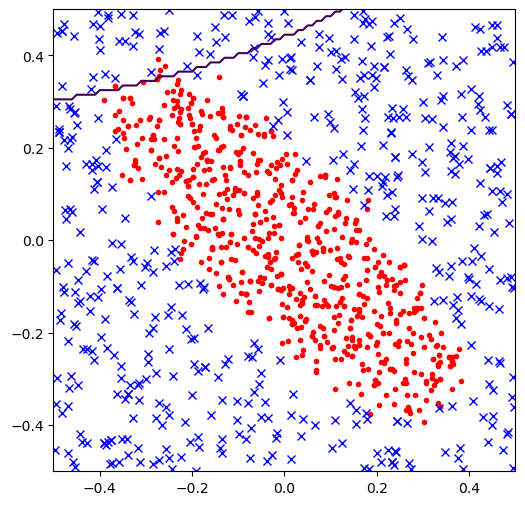

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_dataset(ax)
plot_boundary(ax)
ax.set_aspect("equal")